In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\college_students.csv')
df=df.drop(columns=['Name'])
df

,CGPA,Placement_Exam_Marks,Placed
0,3.77,79.93,1
1,2.49,64.70,0
2,3.34,50.90,1
3,3.54,66.84,1
4,3.92,53.11,1
...,...,...,...
3995,3.71,69.91,1
3996,3.80,54.22,1
3997,3.75,28.93,0
3998,3.62,77.52,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\3658224476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\3658224476.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Placement_Exam_Marks'])


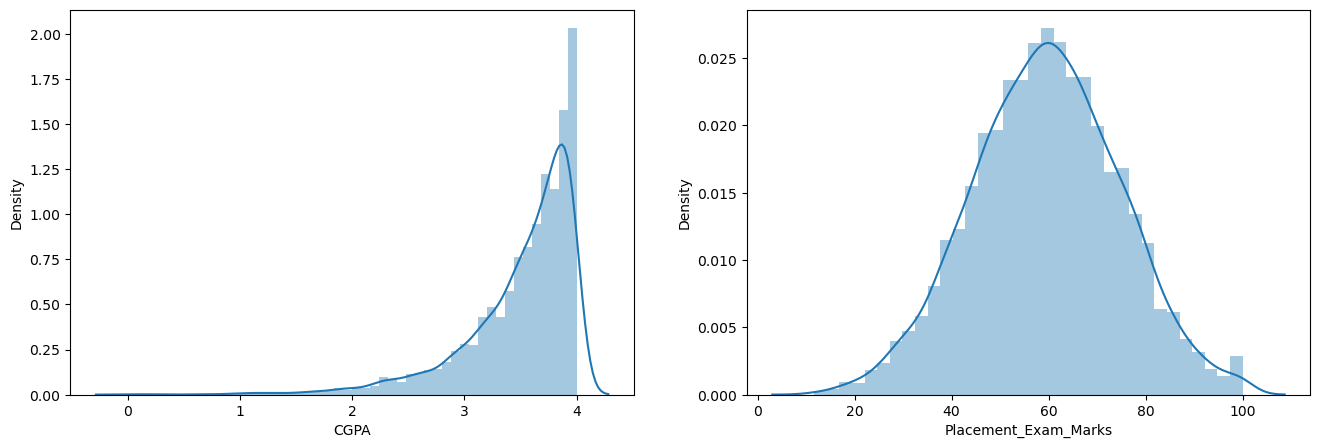

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])

plt.subplot(1,2,2)
sns.distplot(df['Placement_Exam_Marks'])

plt.show()

In [7]:
print("mean value of cgpa ",df['CGPA'].mean())
print("mean value of cgpa ",df['CGPA'].std())
print("mean value of cgpa ",df['CGPA'].min())
print("mean value of cgpa ",df['CGPA'].max())

mean value of cgpa  3.503565
mean value of cgpa  0.495103294872038
mean value of cgpa  0.0
mean value of cgpa  4.0


In [9]:
df['CGPA'].skew()

-1.908073581247061

In [11]:
df['CGPA'].describe()

count    4000.000000
mean        3.503565
std         0.495103
min         0.000000
25%         3.310000
50%         3.650000
75%         3.860000
max         4.000000
Name: CGPA, dtype: float64

<Axes: ylabel='CGPA'>

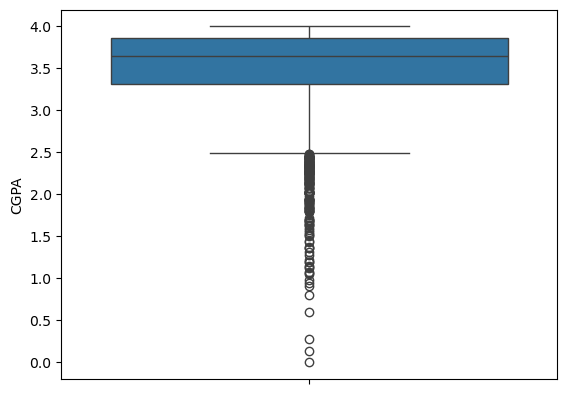

In [25]:
sns.boxplot(df['CGPA'])

In [33]:
percentile25=df['CGPA'].quantile(0.25)
percentile75=df['CGPA'].quantile(0.75)

In [35]:
percentile75

3.86

In [37]:
iqr=percentile75-percentile25

In [39]:
iqr

0.5499999999999998

In [41]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [43]:
print("Upper limit",upper_limit)
print("lower limit",lower_limit)

Upper limit 4.685
lower limit 2.4850000000000003


In [45]:
### find outlier
df[df['CGPA']>upper_limit]

,CGPA,Placement_Exam_Marks,Placed


In [51]:
df[df['CGPA']<lower_limit]

,CGPA,Placement_Exam_Marks,Placed
11,2.25,53.76,1
34,2.31,94.22,0
50,2.25,73.51,0
69,1.83,78.74,0
139,2.22,45.82,0
...,...,...,...
3913,2.08,45.95,0
3914,2.31,39.42,0
3924,1.68,48.31,0
3952,2.16,45.31,0


In [61]:
# triming 
new_df=df[df['CGPA']>lower_limit]
new_df.shape

(3808, 3)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\2279199806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\2279199806.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['CGPA'])


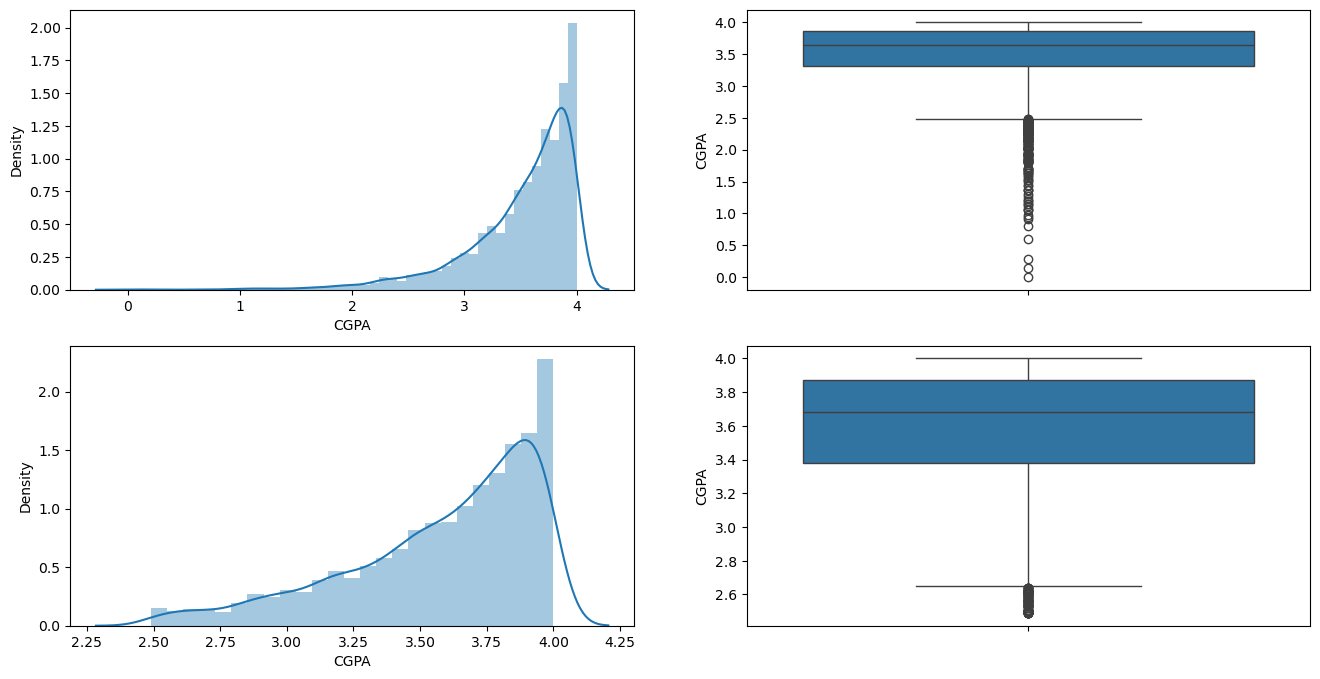

In [63]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CGPA'])

plt.subplot(2,2,2)
sns.boxplot(df['CGPA'])

plt.subplot(2,2,3)
sns.distplot(new_df['CGPA'])

plt.subplot(2,2,4)
sns.boxplot(new_df['CGPA'])

plt.show()

In [65]:
#capping 
new_df_cap=df.copy()

new_df_cap['CGPA']=np.where(
    new_df_cap['CGPA']<lower_limit,
    lower_limit,
    np.where(
        new_df_cap['CGPA']>upper_limit,
        upper_limit,
        new_df_cap['CGPA']
    )
)

In [67]:
new_df_cap.shape

(4000, 3)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\182546301.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21040\182546301.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['CGPA'])


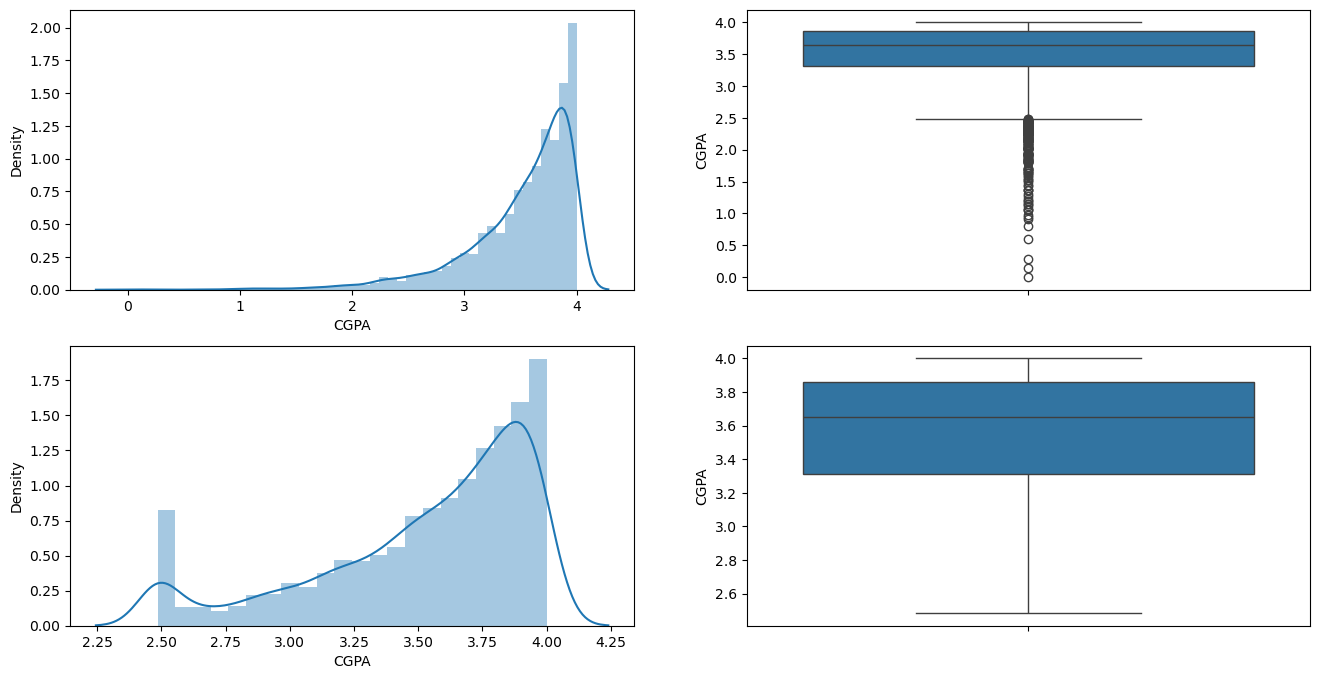

In [69]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CGPA'])

plt.subplot(2,2,2)
sns.boxplot(df['CGPA'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['CGPA'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CGPA'])

plt.show()